## Importing the csv

In [1]:
import pandas as pd

connectome = pd.read_csv('budapest_connectome.csv', sep=';')

connectome.head(3) #remove semicolon if you want to see the database

id node1  id node2                 name node1                name node2  \
0       127       504  rh.caudalmiddlefrontal_11             Right-Putamen   
1       127       145  rh.caudalmiddlefrontal_11          rh.precentral_19   
2       127       131  rh.caudalmiddlefrontal_11  rh.caudalmiddlefrontal_6   

   parent id node1  parent id node2           parent name node1  \
0                9               37  ctx-rh-caudalmiddlefrontal   
1                9               10  ctx-rh-caudalmiddlefrontal   
2                9                9  ctx-rh-caudalmiddlefrontal   

            parent name node2  edge confidence  edge weight(med nof)  
0               Right-Putamen              411                  25.0  
1           ctx-rh-precentral              294                   5.0  
2  ctx-rh-caudalmiddlefrontal              327                   8.0

![alt text](c_format.png "cf")

This should mean that node one is k, node 2 is j, and edge weight represent wkj. 

### Renaming column titles

Lots of the columns have names that would be awkward to work with, so I rename them all at the start.

In [2]:
column_names = ['k', 'j', 'n1_name', 'n2_name', 'n1_parent', 'n2_parent', 'n1_parent_name', 'n2_parent_name', 'confidence', 'wkj']


for i in range(len(column_names)):
       
    connectome.rename(columns={ connectome.columns[i]: column_names[i]}, inplace = True);
    

connectome.head(3) #remove semicolon if you want to see the database

k    j                    n1_name                   n2_name  n1_parent  \
0  127  504  rh.caudalmiddlefrontal_11             Right-Putamen          9   
1  127  145  rh.caudalmiddlefrontal_11          rh.precentral_19          9   
2  127  131  rh.caudalmiddlefrontal_11  rh.caudalmiddlefrontal_6          9   

   n2_parent              n1_parent_name              n2_parent_name  \
0         37  ctx-rh-caudalmiddlefrontal               Right-Putamen   
1         10  ctx-rh-caudalmiddlefrontal           ctx-rh-precentral   
2          9  ctx-rh-caudalmiddlefrontal  ctx-rh-caudalmiddlefrontal   

   confidence   wkj  
0         411  25.0  
1         294   5.0  
2         327   8.0

In [3]:
check_df = connectome.iloc[:, [3, 7]]

check_df

n2_name                  n2_parent_name
0                   Right-Putamen                   Right-Putamen
1                rh.precentral_19               ctx-rh-precentral
2        rh.caudalmiddlefrontal_6      ctx-rh-caudalmiddlefrontal
3                    rh.insula_10                   ctx-rh-insula
4    rh.caudalanteriorcingulate_5  ctx-rh-caudalanteriorcingulate
..                            ...                             ...
995     rh.rostralmiddlefrontal_2     ctx-rh-rostralmiddlefrontal
996     rh.lateralorbitofrontal_1     ctx-rh-lateralorbitofrontal
997              rh.paracentral_7              ctx-rh-paracentral
998              Left-Hippocampus                Left-Hippocampus
999                 Right-Caudate                   Right-Caudate

[1000 rows x 2 columns]

In [4]:
W = connectome.iloc[:,[-1, 0,1]]

W

wkj    k     j
0    25.0  127   504
1     5.0  127   145
2     8.0  127   131
3     6.0  127   494
4     3.0  127   189
..    ...  ...   ...
995   3.5    4    70
996   2.0    4    13
997   4.0  164   178
998   5.0  807  1013
999   4.0  196   503

[1000 rows x 3 columns]

In [5]:
sum(W.loc[:, 'wkj'])

5024.0

In [6]:
table = W.pivot(columns='k', index='j', values='wkj')
out = table.combine_first(table.T)

In [7]:
out

2     3     4     7     8     9     11    12    13    14    ...  1006  \
2      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
3      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
4      NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0   2.0   2.0  ...   NaN   
7      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
8      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1011   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1012   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1013   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1014   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   3.0   
1015   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

      1007  1008  1009  1010  1011  1012  1013  1014  1015  
2      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
7      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
8      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
1011   NaN  11.0  48.0   4.0   NaN   2.0   3.0   2.0   NaN  
1012   NaN   5.0   2.0   2.0   2.0   NaN   6.0   NaN   4.0  
1013   NaN  56.0   7.0  10.0   3.0   6.0  16.0   4.0   2.0  
1014   6.0   6.0   NaN  10.0   2.0   NaN   4.0   2.0   NaN  
1015   NaN  49.0   NaN   NaN   NaN   4.0   2.0   NaN   2.0  

[480 rows x 480 columns]

## Model Explainations

C:\Windows\Temp\ipykernel_32924\933997467.py:240: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  difference_df = pd.concat([difference_df, temp_df], ignore_index=True)


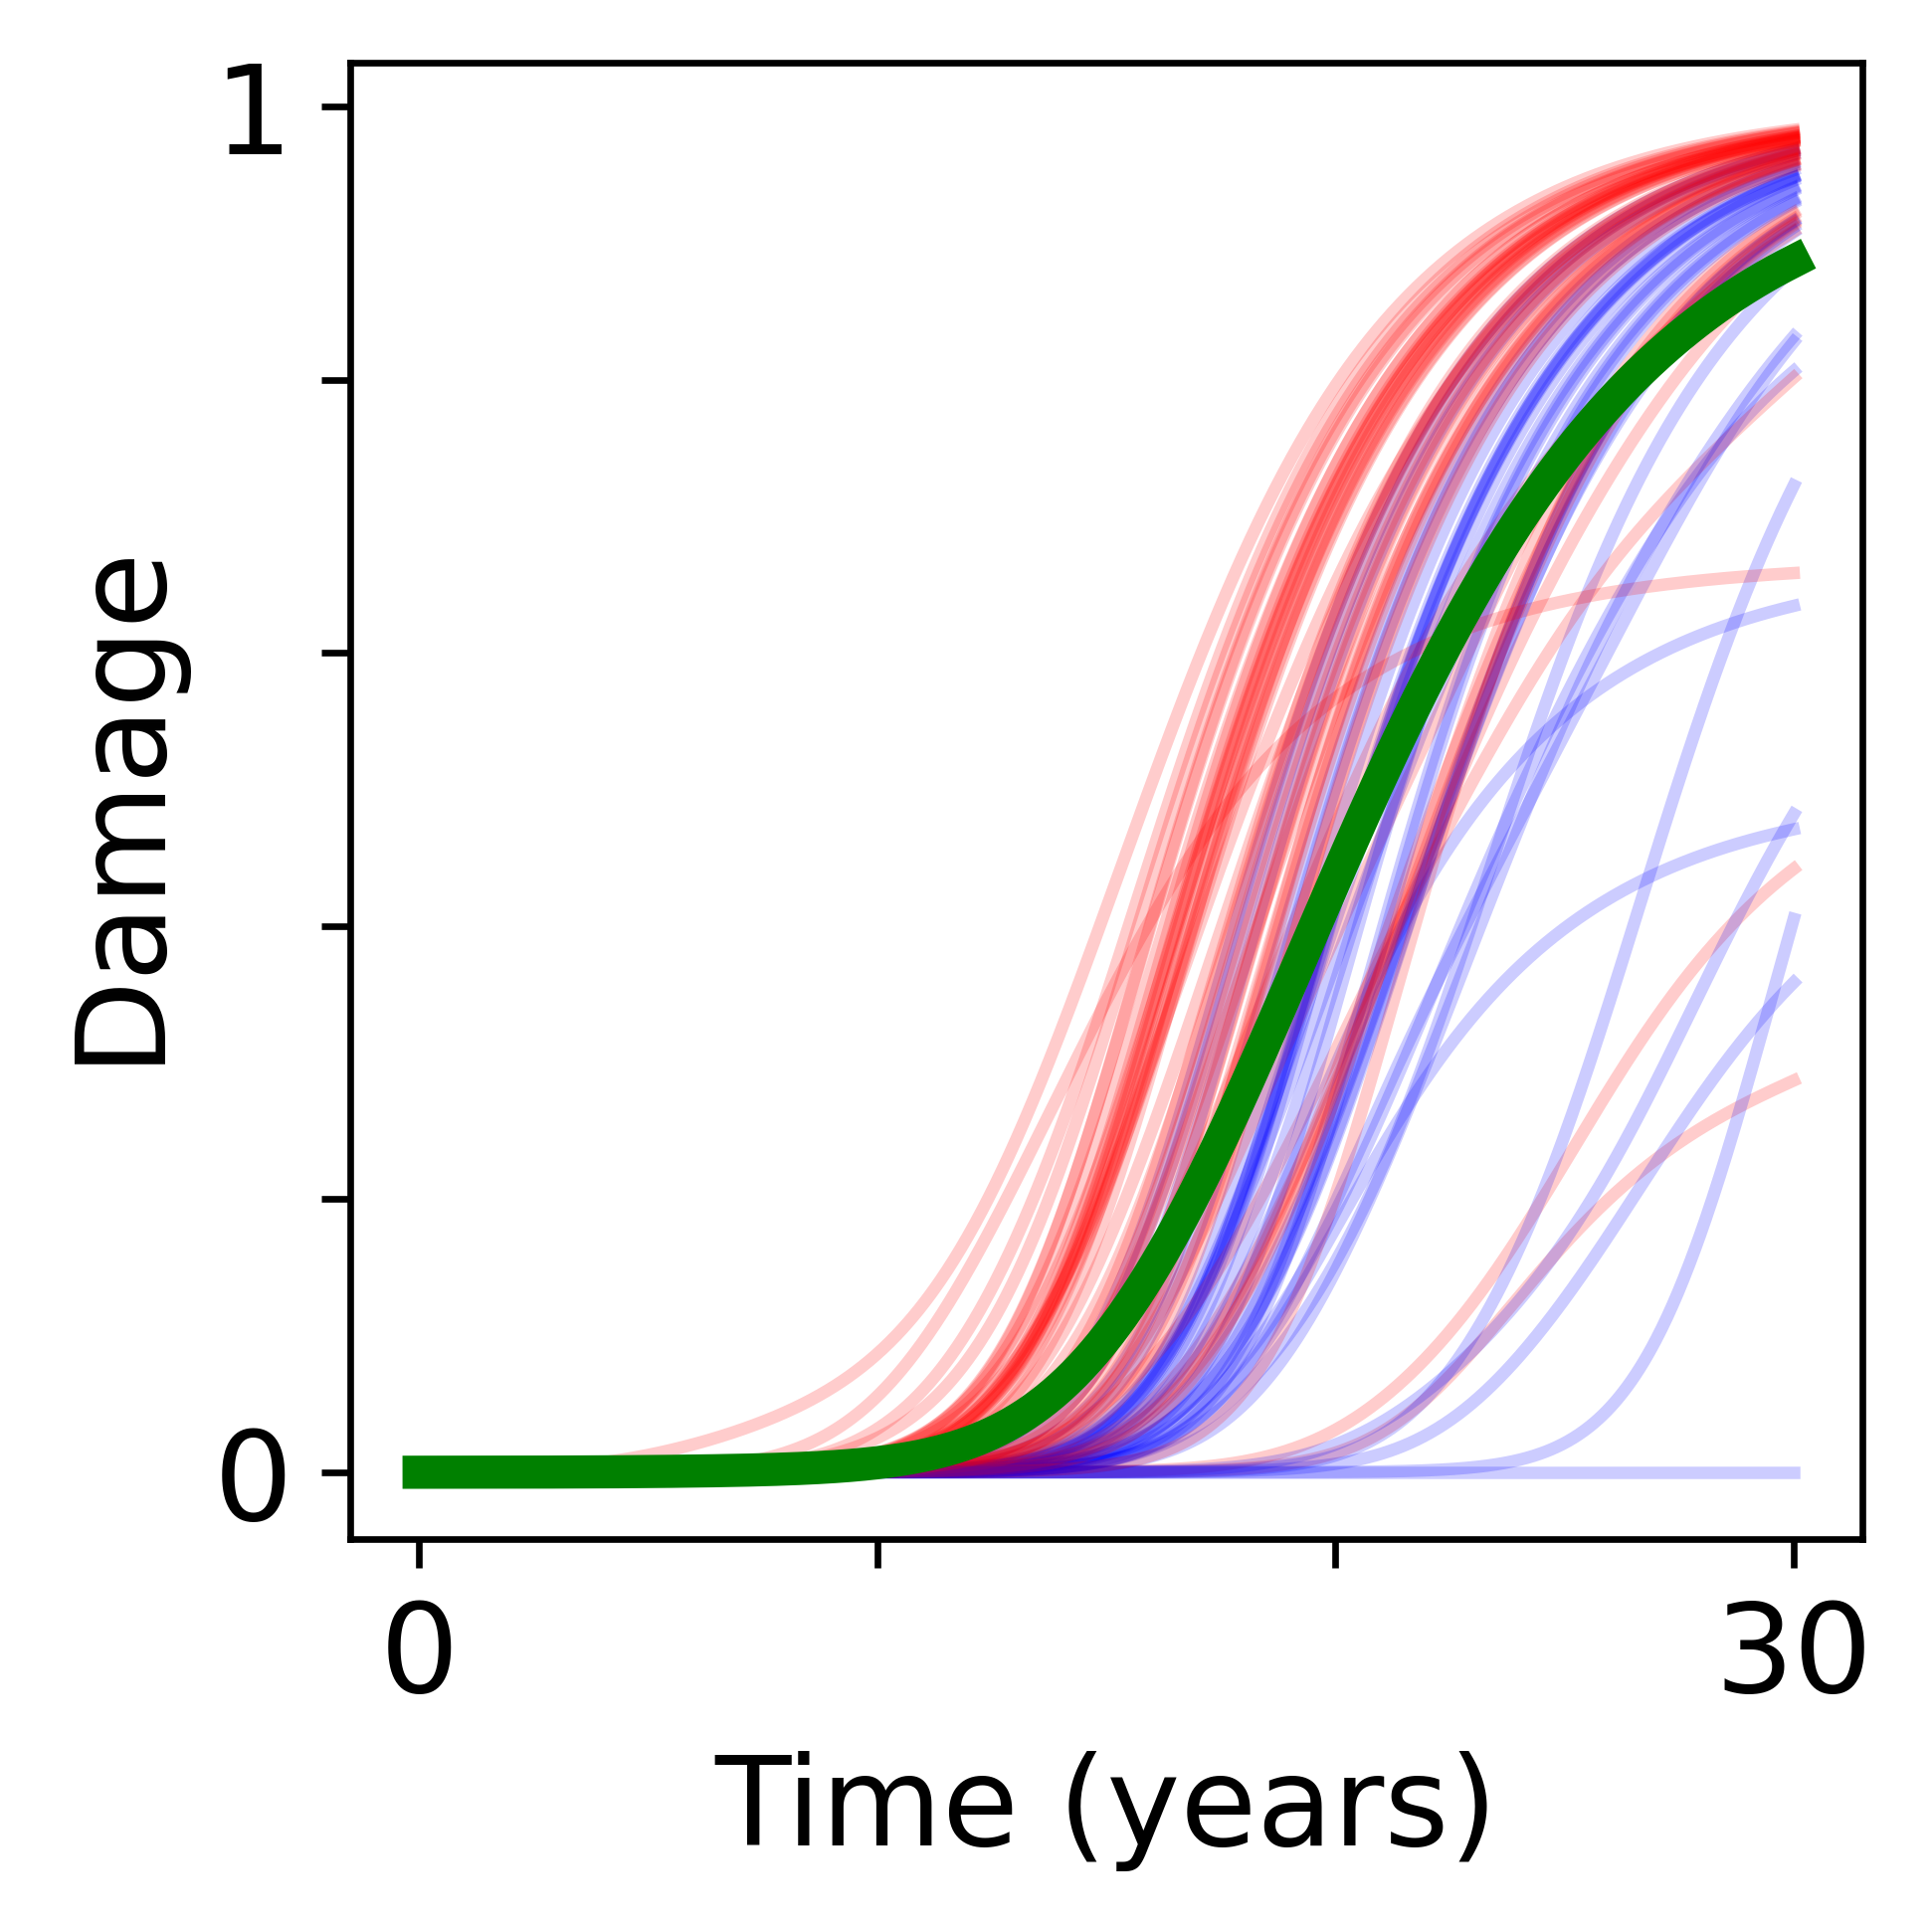

In [179]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

#Settings
selected_region = 'all'

column_width = 3.48

plot_settings = {
    'figsize': (column_width, column_width),
    'dpi': 600
}

plt.rcParams.update({'font.size': 15})


# Load the data from the provided CSV file
#current_dir = os.path.dirname(__file__)
#file_path = os.path.join(current_dir, 'data', 'graph_data.csv')

file_path = ('graph_data.csv')

data = pd.read_csv(file_path, delimiter=';')

# Define model parameters
alpha = 0.75
beta_severe = 1 / 4
gamma_severe = 1 / 8
rho = 1 / 100

# Extract the necessary information
nodes = np.union1d(data['id node1'].values, data['id node2'].values)
num_nodes = len(nodes)
edges = list(zip(data['id node1'], data['id node2']))

# Create a mapping from node ID to index
node_to_index = {node_id: index for index, node_id in enumerate(nodes)}

# Initialize c_k (toxic protein concentration), q_k (node damage), and w_kj (edge weight)
c_k = np.zeros(num_nodes)
q_k = np.zeros(num_nodes)
w_kj = np.zeros((num_nodes, num_nodes))

# Set the initial toxic protein concentration for the entorhinal nodes

# Assume that the node indexes corresponding to the medial frontal area are 26 and 68
entorhinal_nodes = [26, 68]
seed_protein_concentration = 0.025
for entorhinal_node in entorhinal_nodes:
    if entorhinal_node in node_to_index: # Check if the node exists
        c_k[node_to_index[entorhinal_node]] = seed_protein_concentration

for _, row in data.iterrows():
    idx1 = node_to_index[row['id node1']]
    idx2 = node_to_index[row['id node2']]
    weight = row['edge weight(med nof)']
    w_kj[idx1, idx2] = weight
    w_kj[idx2, idx1] = weight

# Check initialization status
(c_k, q_k, w_kj[:5, :5])  # Display only a small part of w_kj to verify initialization status

# Define the differential equation model
def dcdt(c_k, q_k, w_kj, alpha):
    D = np.diag(w_kj.sum(axis=1))  
    L = rho * (D - w_kj) 
    return -L.dot(c_k) + alpha * c_k * (1 - c_k)

def dqdt(c_k, q_k, beta):
    return beta * c_k * (1 - q_k)

def dwdt(w_kj, q_k, gamma):
    q_sum = q_k[:, None] + q_k  # Calculate the sum of damage
    return -gamma * w_kj * q_sum

# Integrate the model equations
def model(y, t, beta, gamma):
    num_variables = 2 * num_nodes + num_nodes**2
    c_k = y[:num_nodes]
    q_k = y[num_nodes:2*num_nodes]
    w_kj = y[2*num_nodes:num_variables].reshape((num_nodes, num_nodes))
    
    # Calculate dc/dt, dq/dt, dw/dt
    dc_dt = dcdt(c_k, q_k, w_kj, alpha)
    dq_dt = dqdt(c_k, q_k, beta)
    dw_dt = dwdt(w_kj, q_k, gamma).flatten()
    
    # Merge them back into a flat array
    dydt = np.concatenate((dc_dt, dq_dt, dw_dt))
    return dydt

# Set the time points
t = np.linspace(0, 30, 1000) # From 0 to 30 years, a total of 1000 time points

# Set initial conditions
y0 = np.concatenate((c_k, q_k, w_kj.flatten()))

# Solve the model under severe damage conditions
sol_severe = odeint(model, y0, t, args=(beta_severe, gamma_severe))
q_k_severe = sol_severe[:, num_nodes:2 * num_nodes]

# Update regex to more accurately reflect classification
# Note: Consider specific region names such as parahippocampal in both temporal and limbic
node_regions = {}
for _, row in data.iterrows():
    node1_name = row['name node1'].lower()  
    node2_name = row['name node2'].lower()

    patterns = {
        'frontal': 'lateralorbitofrontal|parsorbitalis|frontalpole|medialorbitofrontal|parstriangularis|parsopercularis|rostralmiddlefrontal|superiorfrontal|caudalmiddlefrontal|precentral',
        'parietal': 'paracentral|postcentral|supramarginal|superiorparietal|inferiorparietal|precuneus',
        'limbic': 'rostralanteriorcingulate|caudalanteriorcingulate|posteriorcingulate|isthmuscingulate|parahippocampal|entorhinal',
        'occipital': 'cuneus|pericalcarine|lateraloccipital|lingual',
        'temporal': 'fusiform|temporalpole|inferiortemporal|middletemporal|bankssts|superiortemporal|transversetemporal|Right-Hippocampus|Left-Hippocampus',
        'basal_ganglia': 'insula|thalamus|caudate|putamen|pallidum|accumbens|amygdala',
        'brain_stem': 'Brain-Stem'
    }

    patterns['all'] = '|'.join(patterns.values())


    # Define regular expression patterns for each brain region
    #patterns = {
    #    'frontal': 'frontal|orbitofrontal|precentral|rostralanteriorcingulate|caudalanteriorcingulate',
    #    'parietal': 'parietal|postcentral|supramarginal|precuneus',
    #    'occipital': 'occipital|lingual|pericalcarine',
    #    'temporal': 'temporal|superiortemporal|middletemporal|inferiortemporal|fusiform|parahippocampal|entorhinal|temporalpole',
    #    'limbic': 'cingulate|isthmuscingulate|parahippocampal|entorhinal',
    #    'basalganglia': 'caudate|putamen|pallidum|accumbens',
    #    'brainstem': 'brain-stem'
    #}

    #Initialize the area to an empty list
    node1_regions = []
    node2_regions = []

    # Check each area to determine which area the node belongs to
    for region, pattern in patterns.items():
        if re.search(pattern, node1_name):
            node1_regions.append(region)

    for region, pattern in patterns.items():
        if re.search(pattern, node2_name):
            node2_regions.append(region)

    node_regions[row['id node1']] = node1_regions
    node_regions[row['id node2']] = node2_regions

#Group by area and calculate the average damage value of nodes in each area
region_groups = {}
for region in patterns.keys():
    region_nodes = [node for node, node_regions in node_regions.items() if region in node_regions]
    if region_nodes:
        region_indices = [node_to_index[node] for node in region_nodes if node in node_to_index] 
        region_groups[region] = q_k_severe[:, region_indices].mean(axis=1) if region_indices else np.zeros_like(t)
    else:
        region_groups[region] = np.zeros_like(t)

        
###

#selected_region = 'limbic' #placed in settings for easy use

# Define the pattern to identify nodes in the temporal region
current_pattern = patterns[selected_region]
current_nodes = {node: name for node, name in zip(data['id node1'], data['name node1']) if re.search(current_pattern, name.lower())}
current_nodes.update({node: name for node, name in zip(data['id node2'], data['name node2']) if re.search(current_pattern, name.lower())})
current_indices = [node_to_index[node] for node in current_nodes if node in node_to_index]

# Initialize a dictionary to store node indices by parent node and hemisphere
parent_nodes = {}
for node, name in current_nodes.items():
    row_idx = data[(data['id node1'] == node) | (data['id node2'] == node)].index[0]
    
    parent_id = data.loc[row_idx, 'parent id node1'] if node == data.loc[row_idx, 'id node1'] else data.loc[row_idx, 'parent id node2']
    parent_name = data.loc[row_idx, 'parent name node1'] if node == data.loc[row_idx, 'id node1'] else data.loc[row_idx, 'parent name node2']
    
    hemisphere = 'left' if 'lh' in name.lower() else 'right'
    
    # Determine the region of the parent node
    region = 'unknown'  # Default if no match is found
    for super_region, pattern in patterns.items():
        if re.search(pattern, parent_name, re.IGNORECASE):
            region = super_region
            break
    
    if parent_id not in parent_nodes:
        parent_nodes[parent_id] = {'name': parent_name, 'indices': [], 'hemisphere': hemisphere, 'region': region}
    
    parent_nodes[parent_id]['indices'].append(node_to_index[node])

# Define colors and markers
colors = {'left': 'blue', 'right': 'red'}
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

# Correctly initialize `difference_df`
difference_df = pd.DataFrame(columns=['Time', 'Difference', 'Node1_ID', 'Node2_ID', 'Node1_Name', 'Node2_Name'])

# Process each node in the data
for i, row in data.iterrows():
    node_id = row['id node1']
    node_name = row['name node1'].lower()

    # Find equivalent node name by swapping hemispheres
    if 'lh' in node_name:
        equivalent_node_name = node_name.replace('lh', 'rh')
    elif 'rh' in node_name:
        equivalent_node_name = node_name.replace('rh', 'lh')
    else:
        continue  # If no hemisphere designation, skip this node

    # Attempt to find the equivalent node in the data
    equivalent_node_rows = data[(data['name node1'].str.lower() == equivalent_node_name) | 
                                (data['name node2'].str.lower() == equivalent_node_name)]

    if not equivalent_node_rows.empty:
        equivalent_node_id = equivalent_node_rows.iloc[0]['id node1'] if 'id node1' in equivalent_node_rows.iloc[0] else equivalent_node_rows.iloc[0]['id node2']
        equivalent_index = node_to_index.get(equivalent_node_id, None)

        if equivalent_index is not None:
            # Calculate the difference in q_severe values over time
            node_index = node_to_index.get(node_id)
            l_minus_r = q_k_severe[:, node_index] - q_k_severe[:, equivalent_index]
            r_minus_l = q_k_severe[:, equivalent_index] - q_k_severe[:, node_index]

            # Prepare a DataFrame to save the results
            temp_df = pd.DataFrame({
                'Time': t,
                'Difference': l_minus_r,
                'Difference2': r_minus_l,
                'Node1_ID': node_id,
                'Node2_ID': equivalent_node_id,
                'Node1_Name': node_name,
                'Node2_Name': equivalent_node_name
            })
            difference_df = pd.concat([difference_df, temp_df], ignore_index=True)

# Initializing DataFrame to store results
differences_list = []
hem_list=[]
nam=[]

# Define color mapping for left and right hemispheres for visual distinction
color_map = {'left': 'blue', 'right': 'red', 'unknown':'grey'}

# Process each node to find its equivalent and calculate the difference in damage metrics
for i, row in data.iterrows():
    for col in ['id node1', 'id node2']:  # Check both node columns for matches
        node_id = row[col]
        node_name = row[col.replace('id', 'name')].lower()
        #hemisphere = 'left' if 'lh' in node_name else 'right'
        hemisphere = 'left' if 'lh' in node_name.lower() or 'left' in node_name.lower() else 'right' if 'rh' in node_name.lower() or 'right' in node_name.lower() else 'unknown'      

        # Create equivalent node name by swapping hemisphere prefix
        equivalent_node_name = node_name.replace('lh', 'rh') if 'lh' in node_name else node_name.replace('rh', 'lh')

        # Find rows that contain the equivalent node
        equivalent_rows = data[(data['name node1'].str.lower() == equivalent_node_name) | (data['name node2'].str.lower() == equivalent_node_name)]
        
        if not equivalent_rows.empty:
            equivalent_node_id = equivalent_rows.iloc[0]['id node1'] if 'id node1' in equivalent_rows.columns else equivalent_rows.iloc[0]['id node2']
            if node_id in node_to_index and equivalent_node_id in node_to_index:
                # Calculate the difference in q_severe values over time
                node_index = node_to_index[node_id]
                equivalent_index = node_to_index[equivalent_node_id]
                difference = q_k_severe[:, node_index] - q_k_severe[:, equivalent_index]
                
                # Store the results
                differences_list.append({
                    'time': t,
                    'difference': difference,
                    'node_pair': f"{node_name} ({node_id}) vs {equivalent_node_name} ({equivalent_node_id})",
                    'hemisphere': hemisphere
                })
                hem_list.append(hemisphere)
                nam.append(node_name)

# Plotting
region_plot = plt.figure(**plot_settings)
marker_index = 0
for parent_id, info in parent_nodes.items():
    indices = info['indices']
    mean_damage = q_k_severe[:, indices].mean(axis=1)
    color = colors[info['hemisphere']]
    marker = markers[marker_index % len(markers)]  # Cycle through markers
    plt.plot(t, mean_damage, label=f"{info['name']} ({info['hemisphere'].capitalize()})", 
             color=color, marker=marker, linestyle='-', markevery=30, markersize=0, alpha=0.2)  # Sparsing the markers and reducing their size
    marker_index += 1

#plt.title('Mean Damage Evolution in Temporal Region \nby Parent Node and Hemisphere')
plt.xlabel('Time (years)')
plt.ylabel('Damage')
#plt.legend(title='Parent Nodes and Hemispheres', bbox_to_anchor=(-0.1, 1), loc='upper right')


# Plotting the overall mean for the temporal region in black
overall_mean_damage = q_k_severe[:, [node_to_index[node] for node in current_nodes if node in node_to_index]].mean(axis=1)
plt.plot(t, overall_mean_damage, 'green', label='Overall Temporal Mean', linewidth=4)  # Black line for overall mean

# Add manual legend entries for hemispheres and region mean
# Create custom handles (legend entries)
#from matplotlib.lines import Line2D
#custom_lines = [
#    Line2D([0], [0], color='red', lw=4, label='Left Hemisphere nodes'),
#    Line2D([0], [0], color='blue', lw=4, label='Right Hemisphere nodes'),
#    Line2D([0], [0], color='green', lw=4, label='Region Mean')
#]

# Adding the custom legend to the plot
#plt.legend(handles=custom_lines, loc='best')  # Use the custom handles here
savename = selected_region + "_region_plot.png"

plt.xticks([0, 10, 20, 30])
plt.gca().set_xticklabels(['0', '', '', '30'])

plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.gca().set_yticklabels(['0', '', '', '', '', '1'])

# saves the plot
plt.tight_layout()
plt.savefig(savename)

AttributeError: Line2D.set() got an unexpected keyword argument 'fontsize'

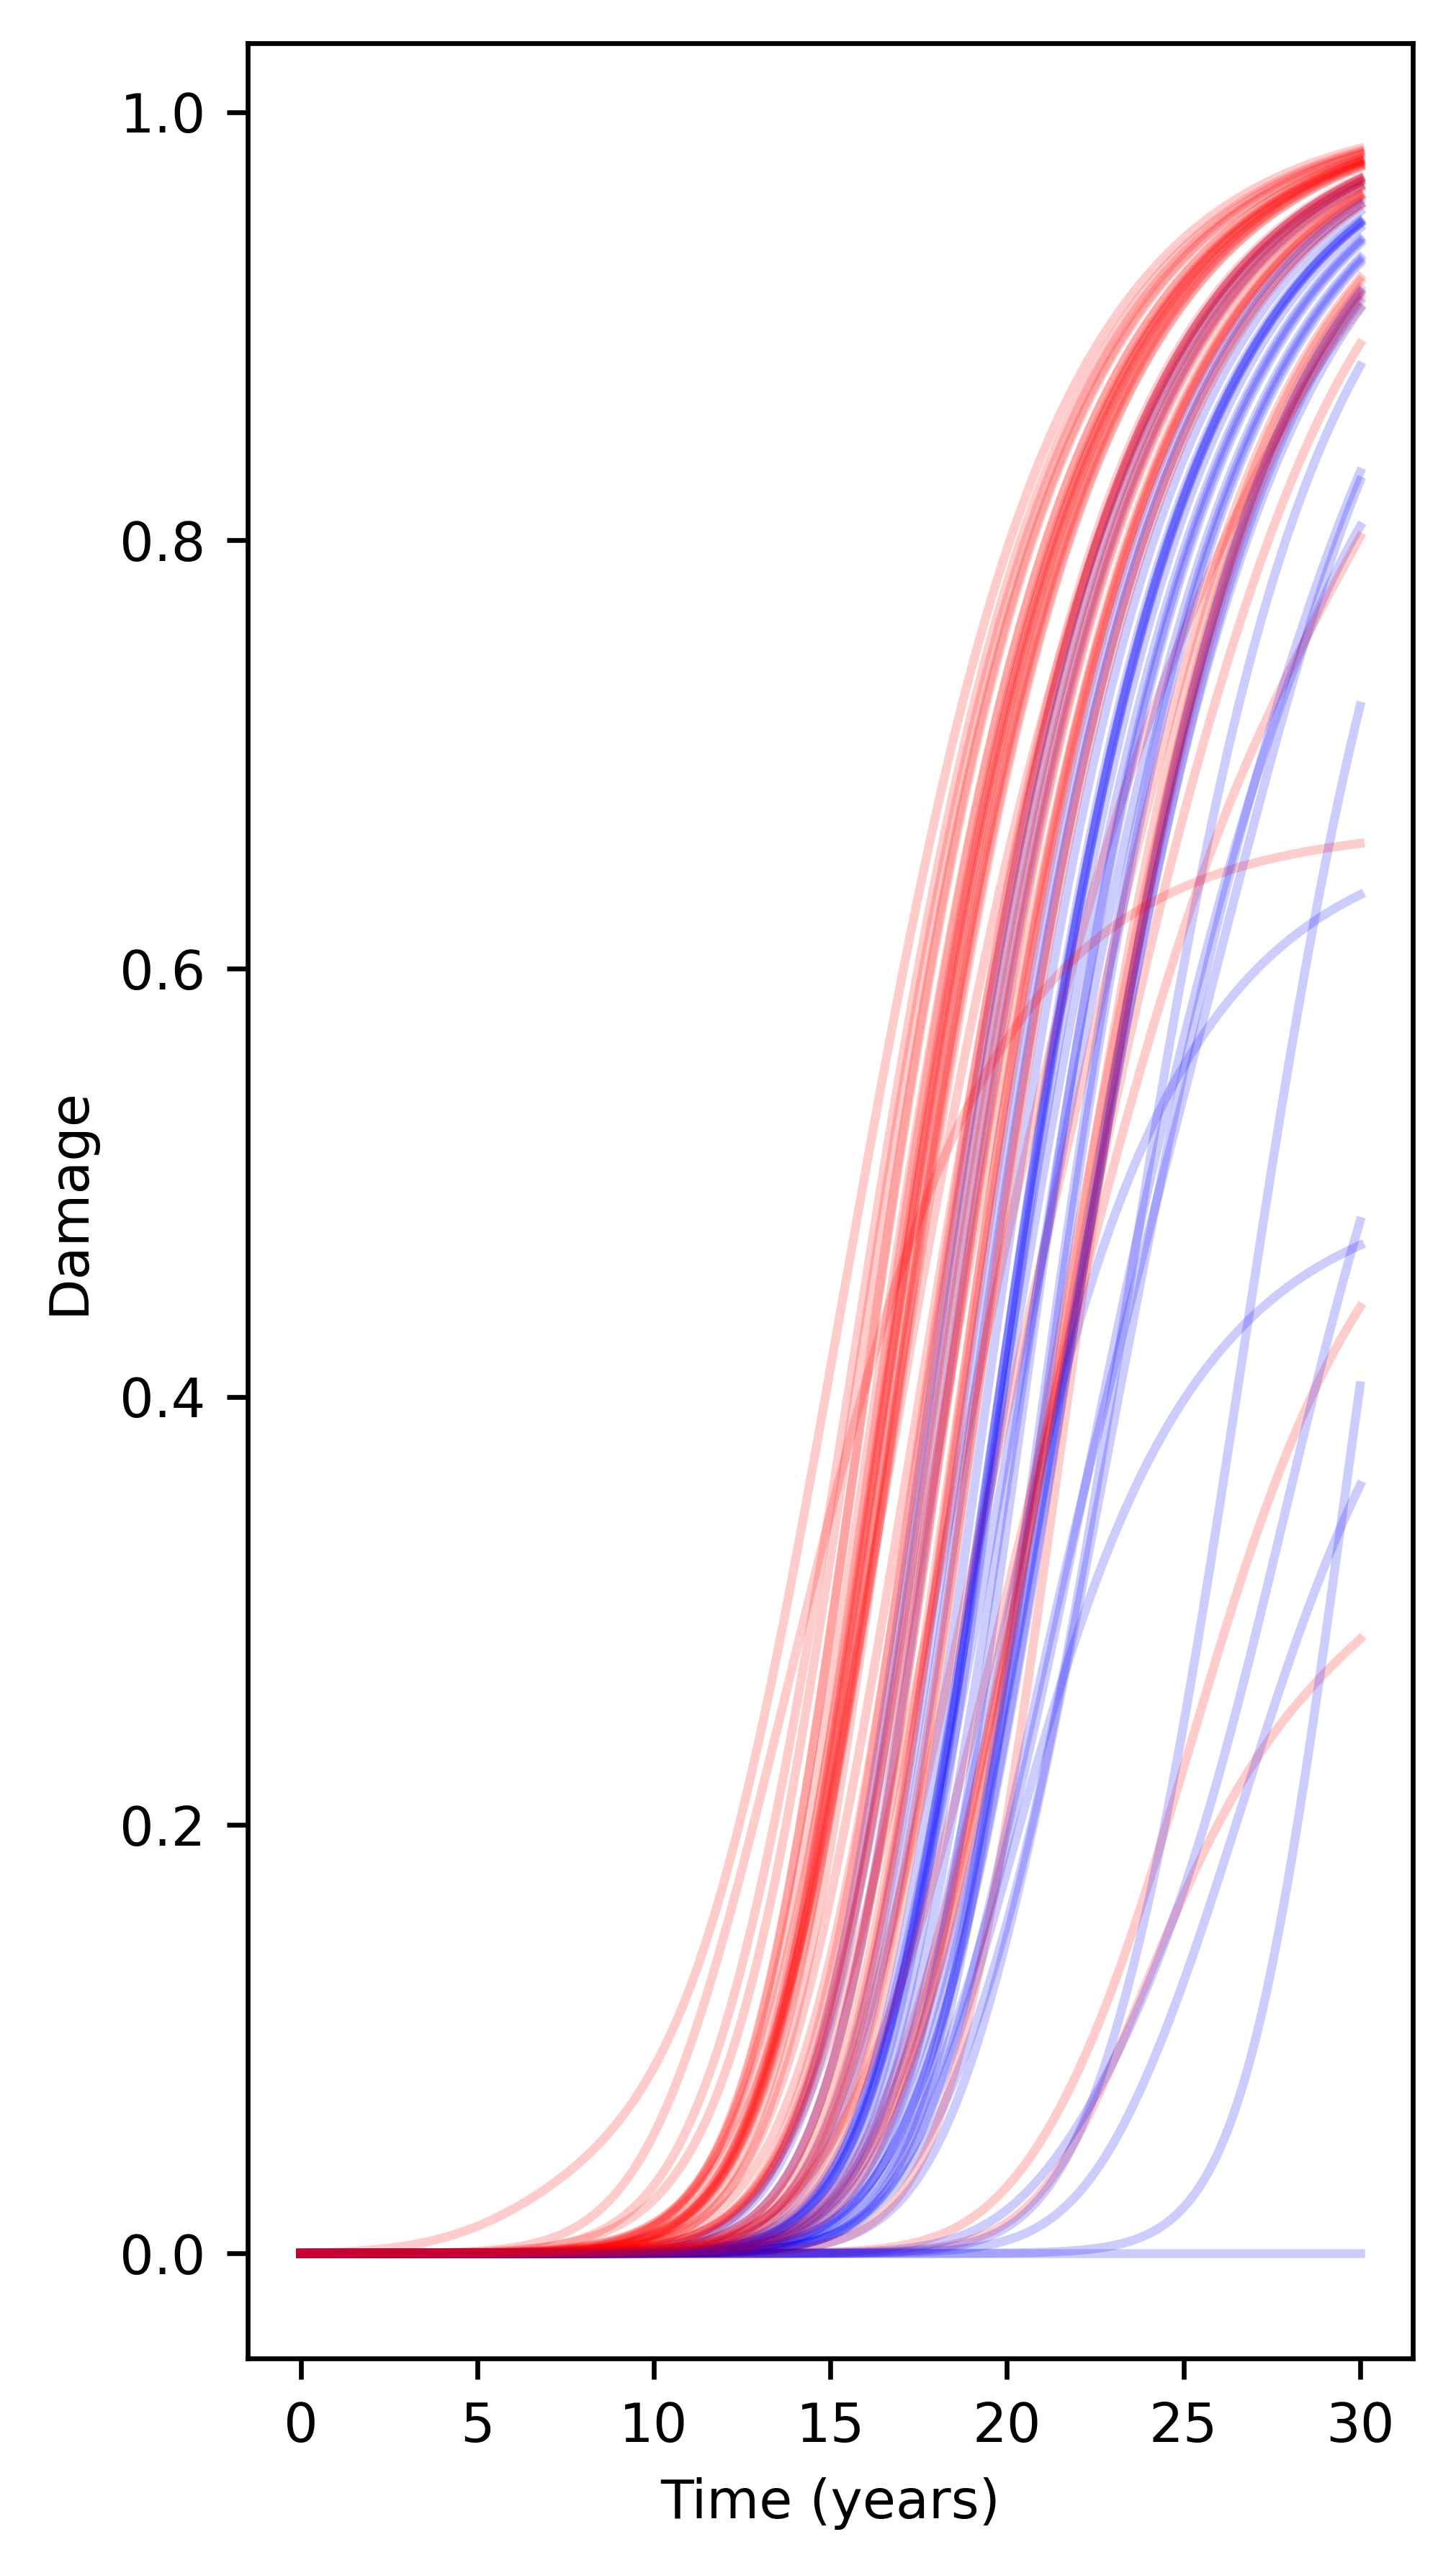

In [185]:
# Plotting
region_plot = plt.figure(**plot_settings)
marker_index = 0
for parent_id, info in parent_nodes.items():
    indices = info['indices']
    mean_damage = q_k_severe[:, indices].mean(axis=1)
    color = colors[info['hemisphere']]
    marker = markers[marker_index % len(markers)]  # Cycle through markers
    plt.plot(t, mean_damage, label=f"{info['name']} ({info['hemisphere'].capitalize()})", 
             color=color, marker=marker, linestyle='-', markevery=30, markersize=0, alpha=0.2)  # Sparsing the markers and reducing their size
    marker_index += 1

#plt.title('Mean Damage Evolution in Temporal Region \nby Parent Node and Hemisphere')
plt.xlabel('Time (years)')
plt.ylabel('Damage')
#plt.legend(title='Parent Nodes and Hemispheres', bbox_to_anchor=(-0.1, 1), loc='upper right')


# Plotting the overall mean for the temporal region in black
overall_mean_damage = q_k_severe[:, [node_to_index[node] for node in current_nodes if node in node_to_index]].mean(axis=1)
plt.plot(t, overall_mean_damage, 'green', label='Overall Temporal Mean', linewidth=4, fontsize=6)  # Black line for overall mean

# Add manual legend entries for hemispheres and region mean
# Create custom handles (legend entries)
from matplotlib.lines import Line2D
custom_lines = [
    Line2D([0], [0], color='red', lw=4, label='LH nodes'),
    Line2D([0], [0], color='blue', lw=4, label='RH nodes'),
    Line2D([0], [0], color='green', lw=4, label='Mean')
]

# Adding the custom legend to the plot
plt.legend(handles=custom_lines, loc='best', fontsize = 6)  # Use the custom handles here
savename = selected_region + "_region_plot.png"

plt.xticks([0, 10, 20, 30])
plt.gca().set_xticklabels(['0', '10', '20', '30'])

plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.gca().set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1'])

# saves the plot
plt.tight_layout()
plt.savefig(savename)

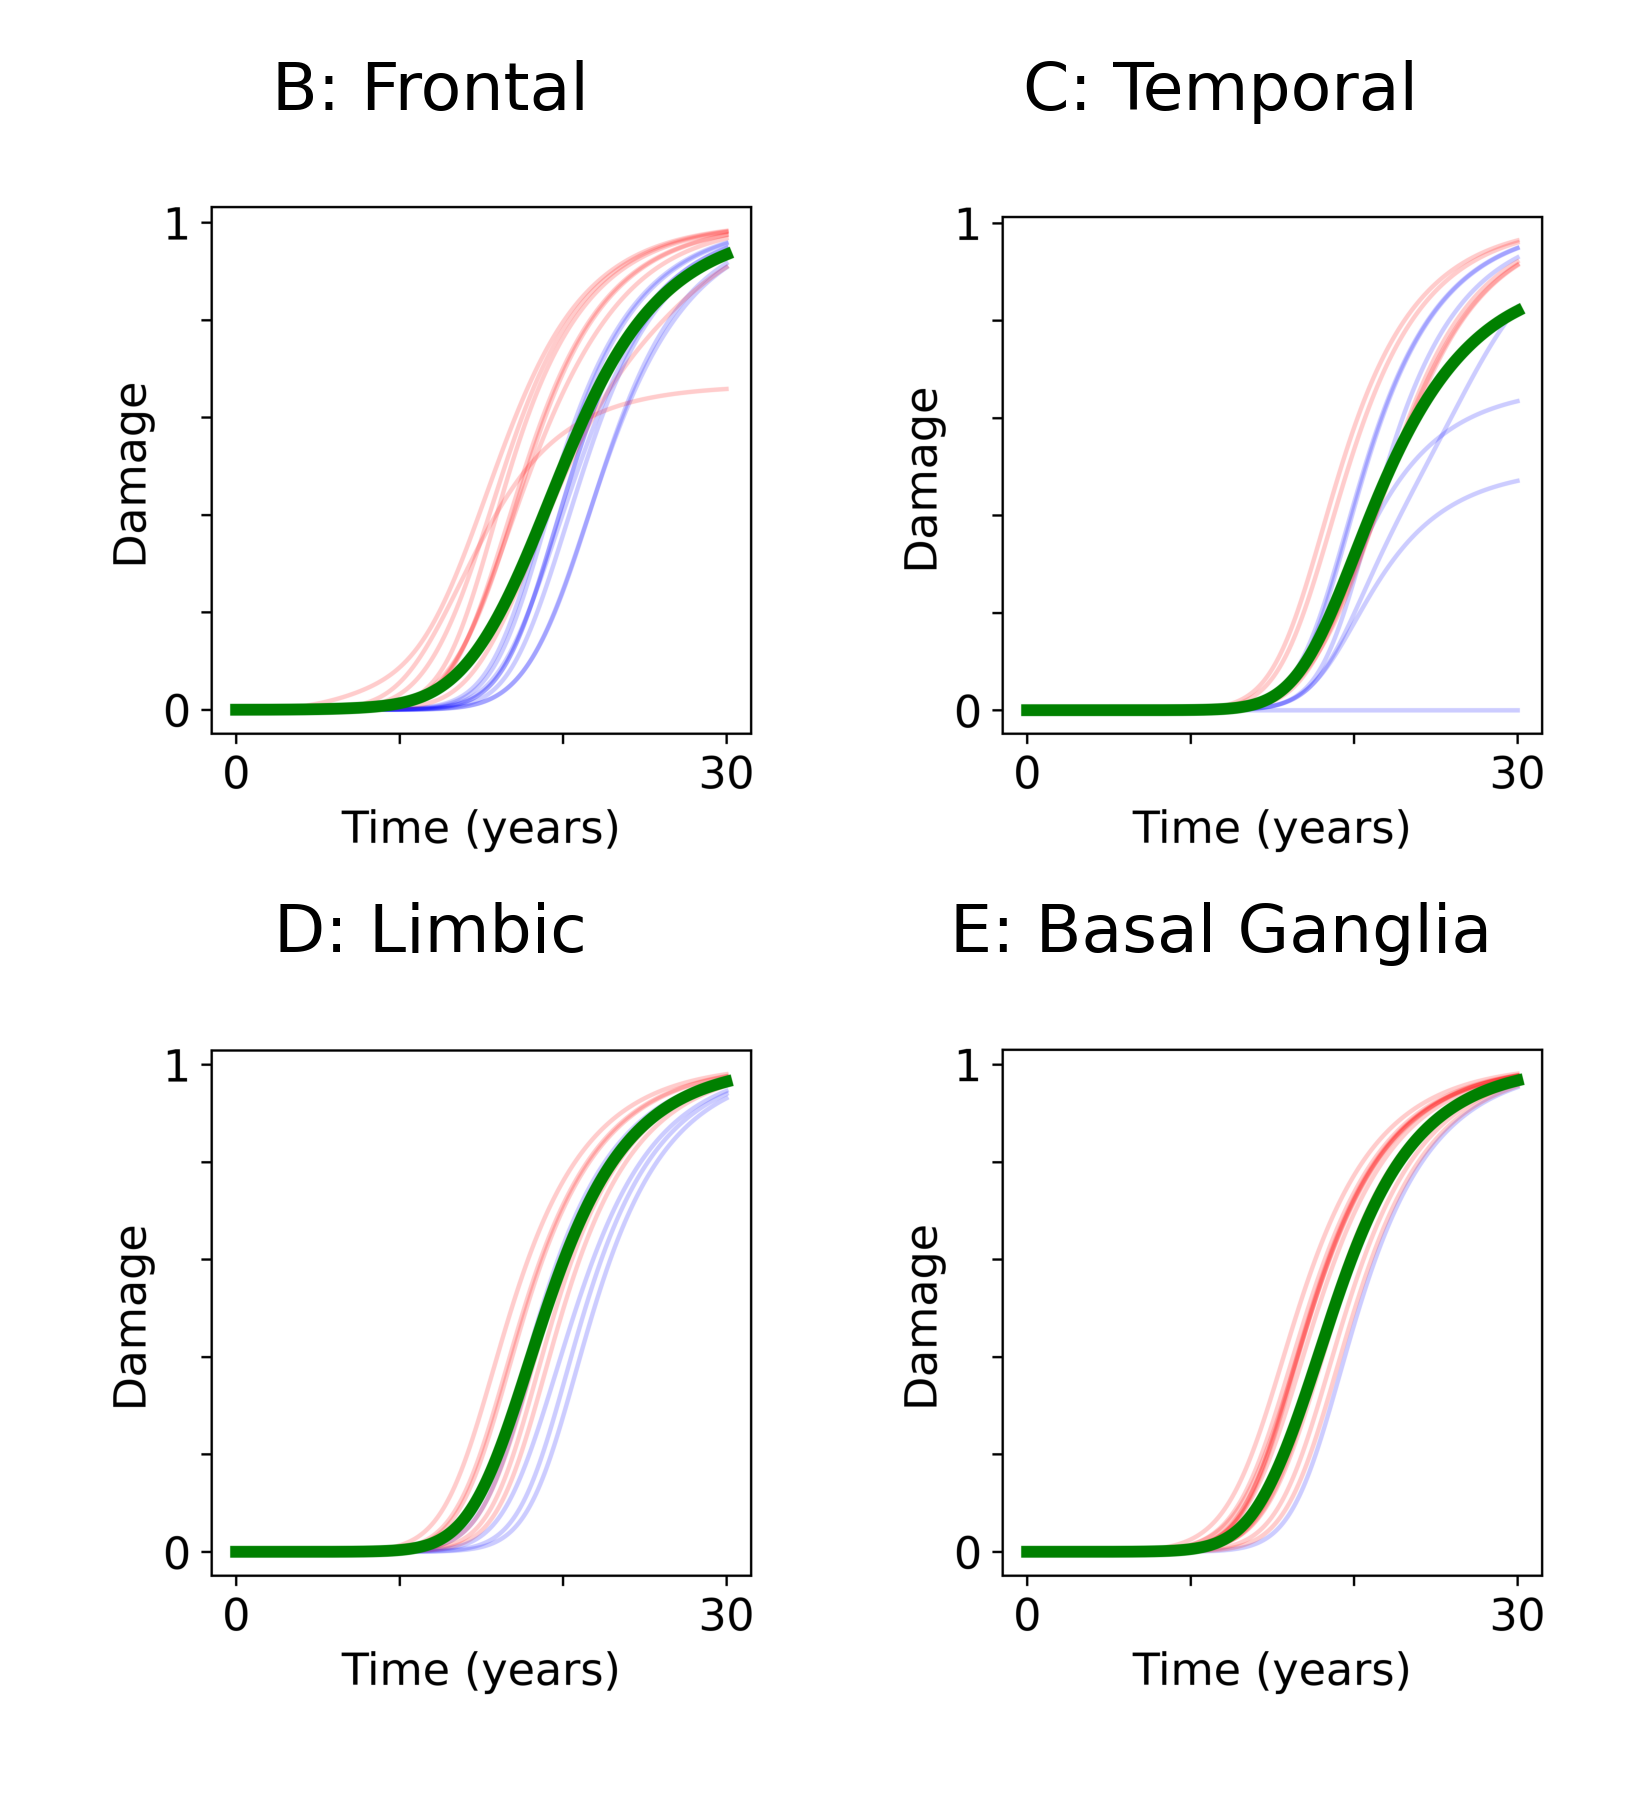

In [177]:
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D

column_width = 3.48  # Preserving your specified column width

plot_settings = {
    'figsize': (column_width, column_width),  # Square figure
    'dpi': 600
}

plt.rcParams.update({'font.size': 9})

# Paths to your PNG files
image_paths = ['frontal_region_plot.png', 'temporal_region_plot.png', 'limbic_region_plot.png', 'basal_ganglia_region_plot.png']

# Labels for each subplot
labels = ['B: Frontal', 'C: Temporal', 'D: Limbic', 'E: Basal Ganglia']

# Create a figure with a grid layout
fig = plt.figure(**plot_settings)
# Set up a gridspec with 4 plots in a 2x2 grid and a fifth, empty plot for the legend
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 0.05], wspace=0.1, hspace=0.1)

# Load and display each image in its respective subplot
for i, path in enumerate(image_paths):
    img = Image.open(path)
    ax = fig.add_subplot(gs[i // 2, i % 2])
    ax.imshow(img)
    ax.set_title(labels[i], fontsize=8)  # Use labels from the list
    ax.axis('off')  # Hide axes

# Custom lines for the shared legend
# Adjust these lines to match the actual lines in your plots
#custom_lines = [
#    Line2D([0], [0], color='red', lw=2),
#    Line2D([0], [0], color='blue', lw=2),
#    Line2D([0], [0], color='green', lw=2)
#]

# Create a shared legend
#legend_ax = fig.add_subplot(gs[:, 2])  # Add subplot for legend
#legend_ax.legend(custom_lines, ['LH \nnodes', 'RH \nnodes', 'Region \nMean'], loc='center', fontsize=5, handlelength=2, handletextpad=0.5, labelspacing=2)
#legend_ax.axis('off')  # Hide axes for legend subplot

# Tight layout often produces overlaps when legend is outside the plots, so it's omitted here
# Instead, adjust the subplots parameters manually
#plt.subplots_adjust(left=0.05, right=1.1, top=1, bottom=0.05)

# Save the figure with legend on the right
plt.savefig('bigplot_with_legend.png', bbox_inches='tight')
plt.show()


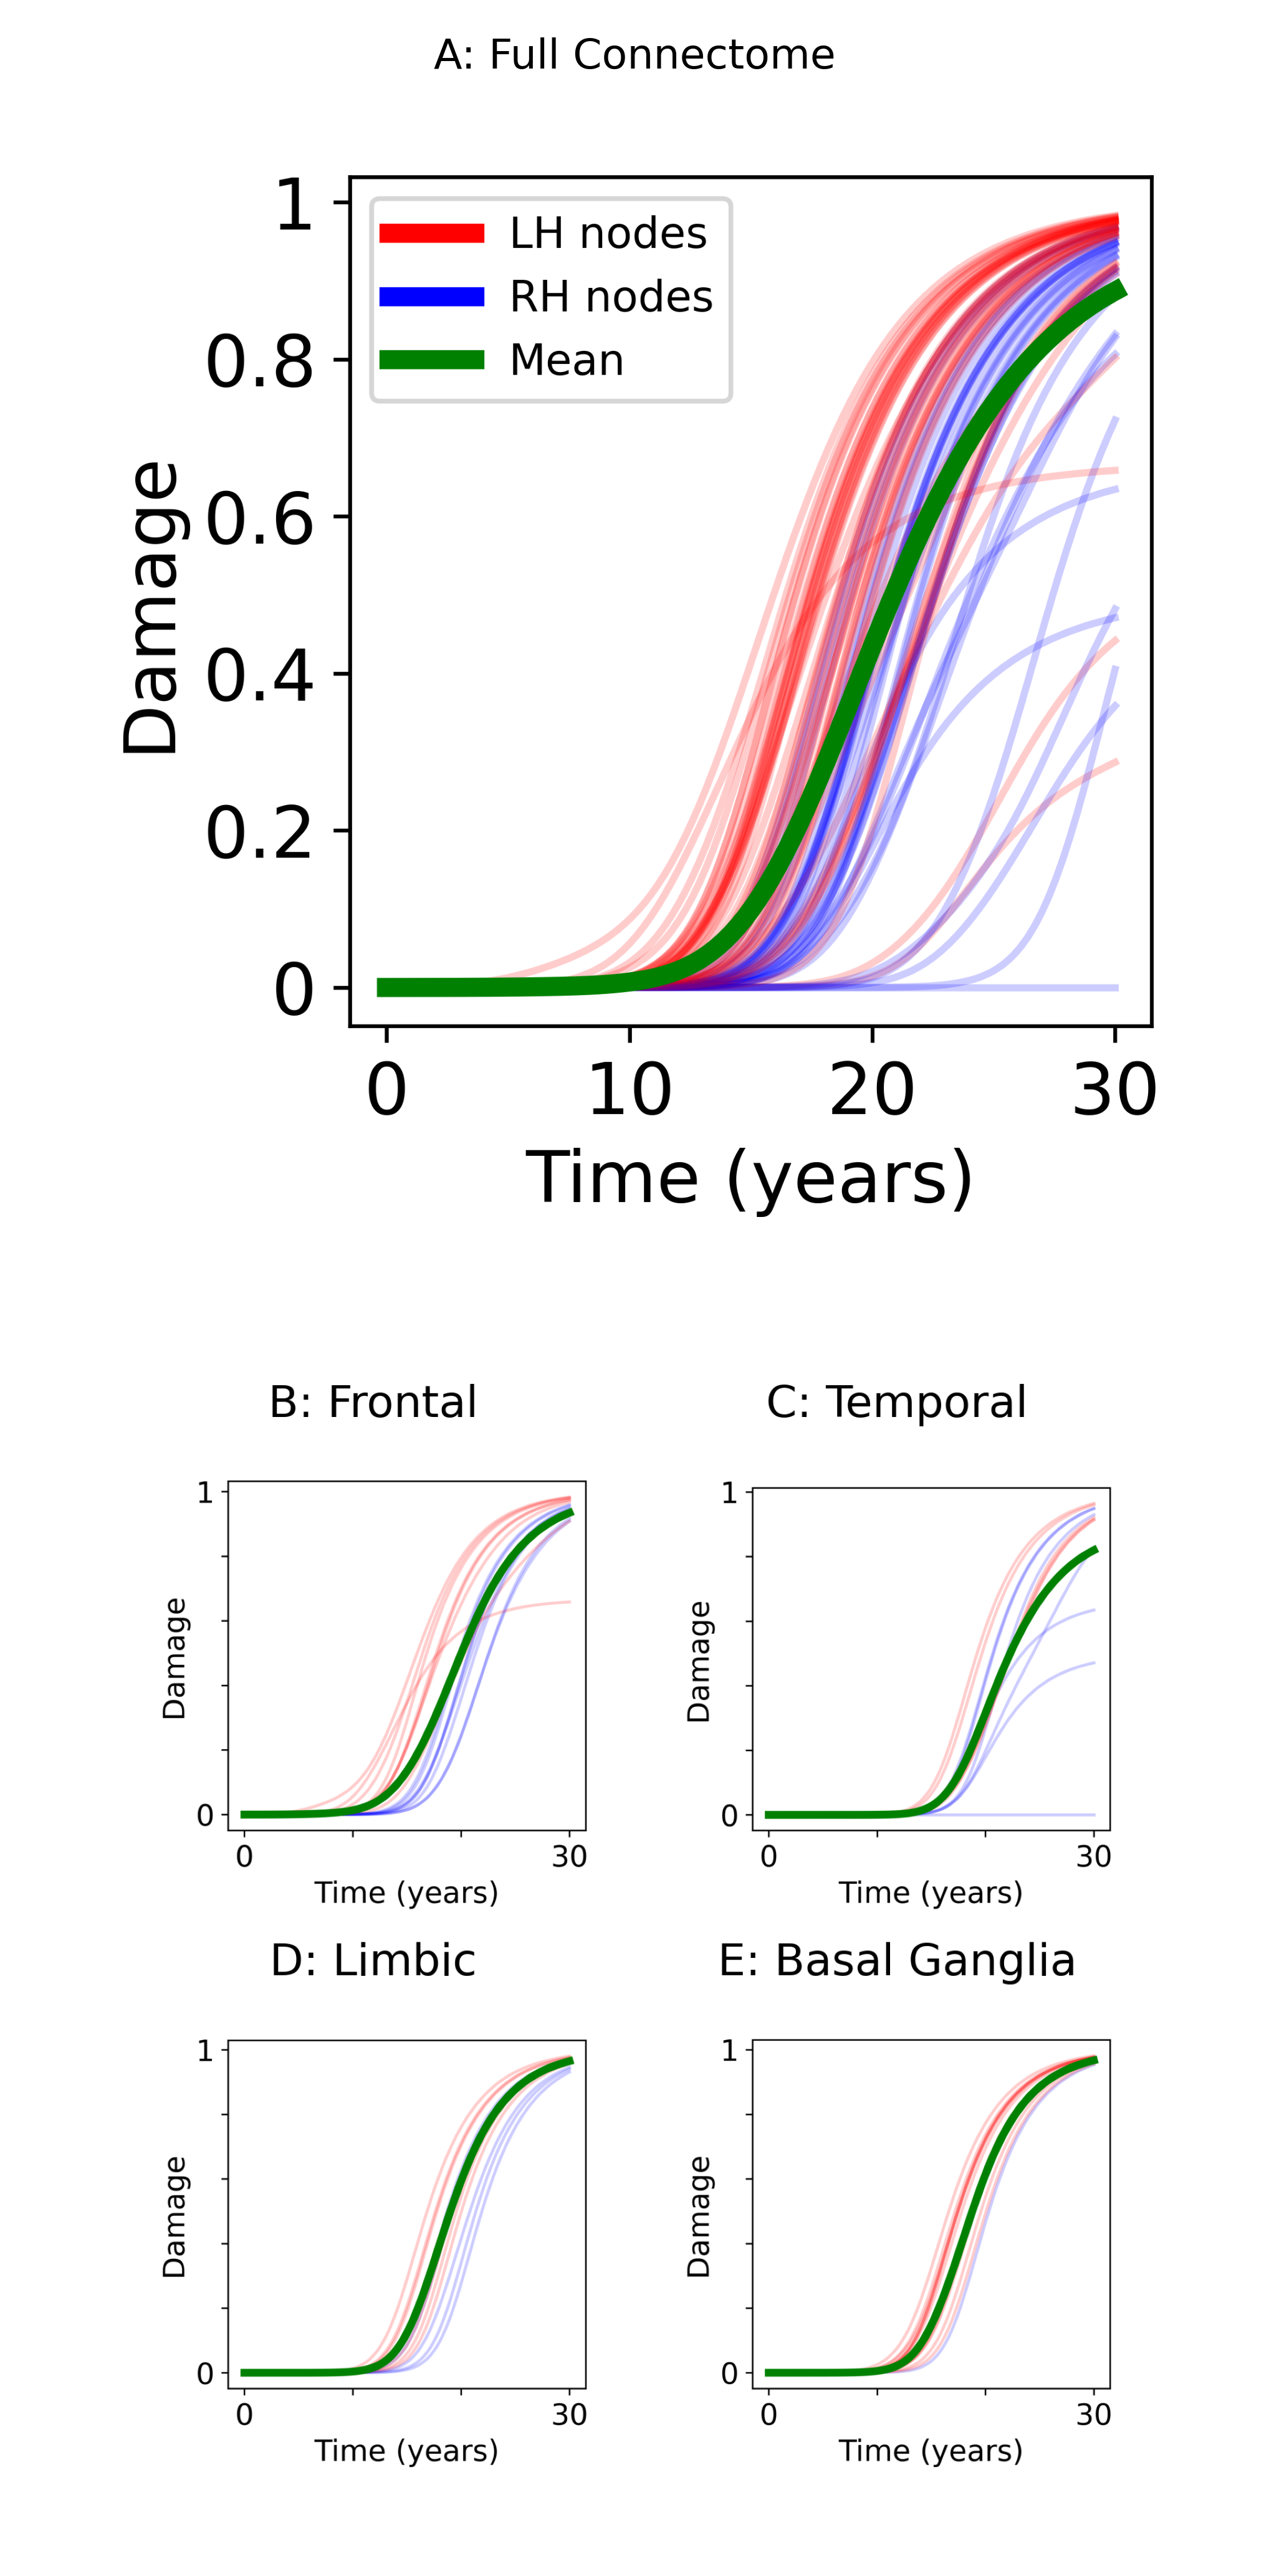

In [184]:
import matplotlib.pyplot as plt
from PIL import Image

column_width = 3.48  # Preserving your specified column width

# Adjust the height of the plot to accommodate two images one above the other
plot_height = column_width * 2
plot_settings = {
    'figsize': (column_width, plot_height),  # Double height for two images
    'dpi': 600
}

plt.rcParams.update({'font.size': 9})

# Paths to your PNG files (top and bottom images)
image_paths = ['all_region_plot.png', 'bigplot_with_legend.png']

# Create a figure with a vertical layout
fig, axs = plt.subplots(2, 1, **plot_settings)

# Load and display the top image
top_img = Image.open(image_paths[0])
axs[0].imshow(top_img)
axs[0].set_title('A: Full Connectome', fontsize=8)
axs[0].axis('off')  # Hide axes

# Load and display the bottom image
bottom_img = Image.open(image_paths[1])
axs[1].imshow(bottom_img)
axs[1].axis('off')  # Hide axes

# Adjust the layout
plt.tight_layout()

# Save the figure with both images included
plt.savefig('subplot_two_images.png', bbox_inches='tight')
plt.show()


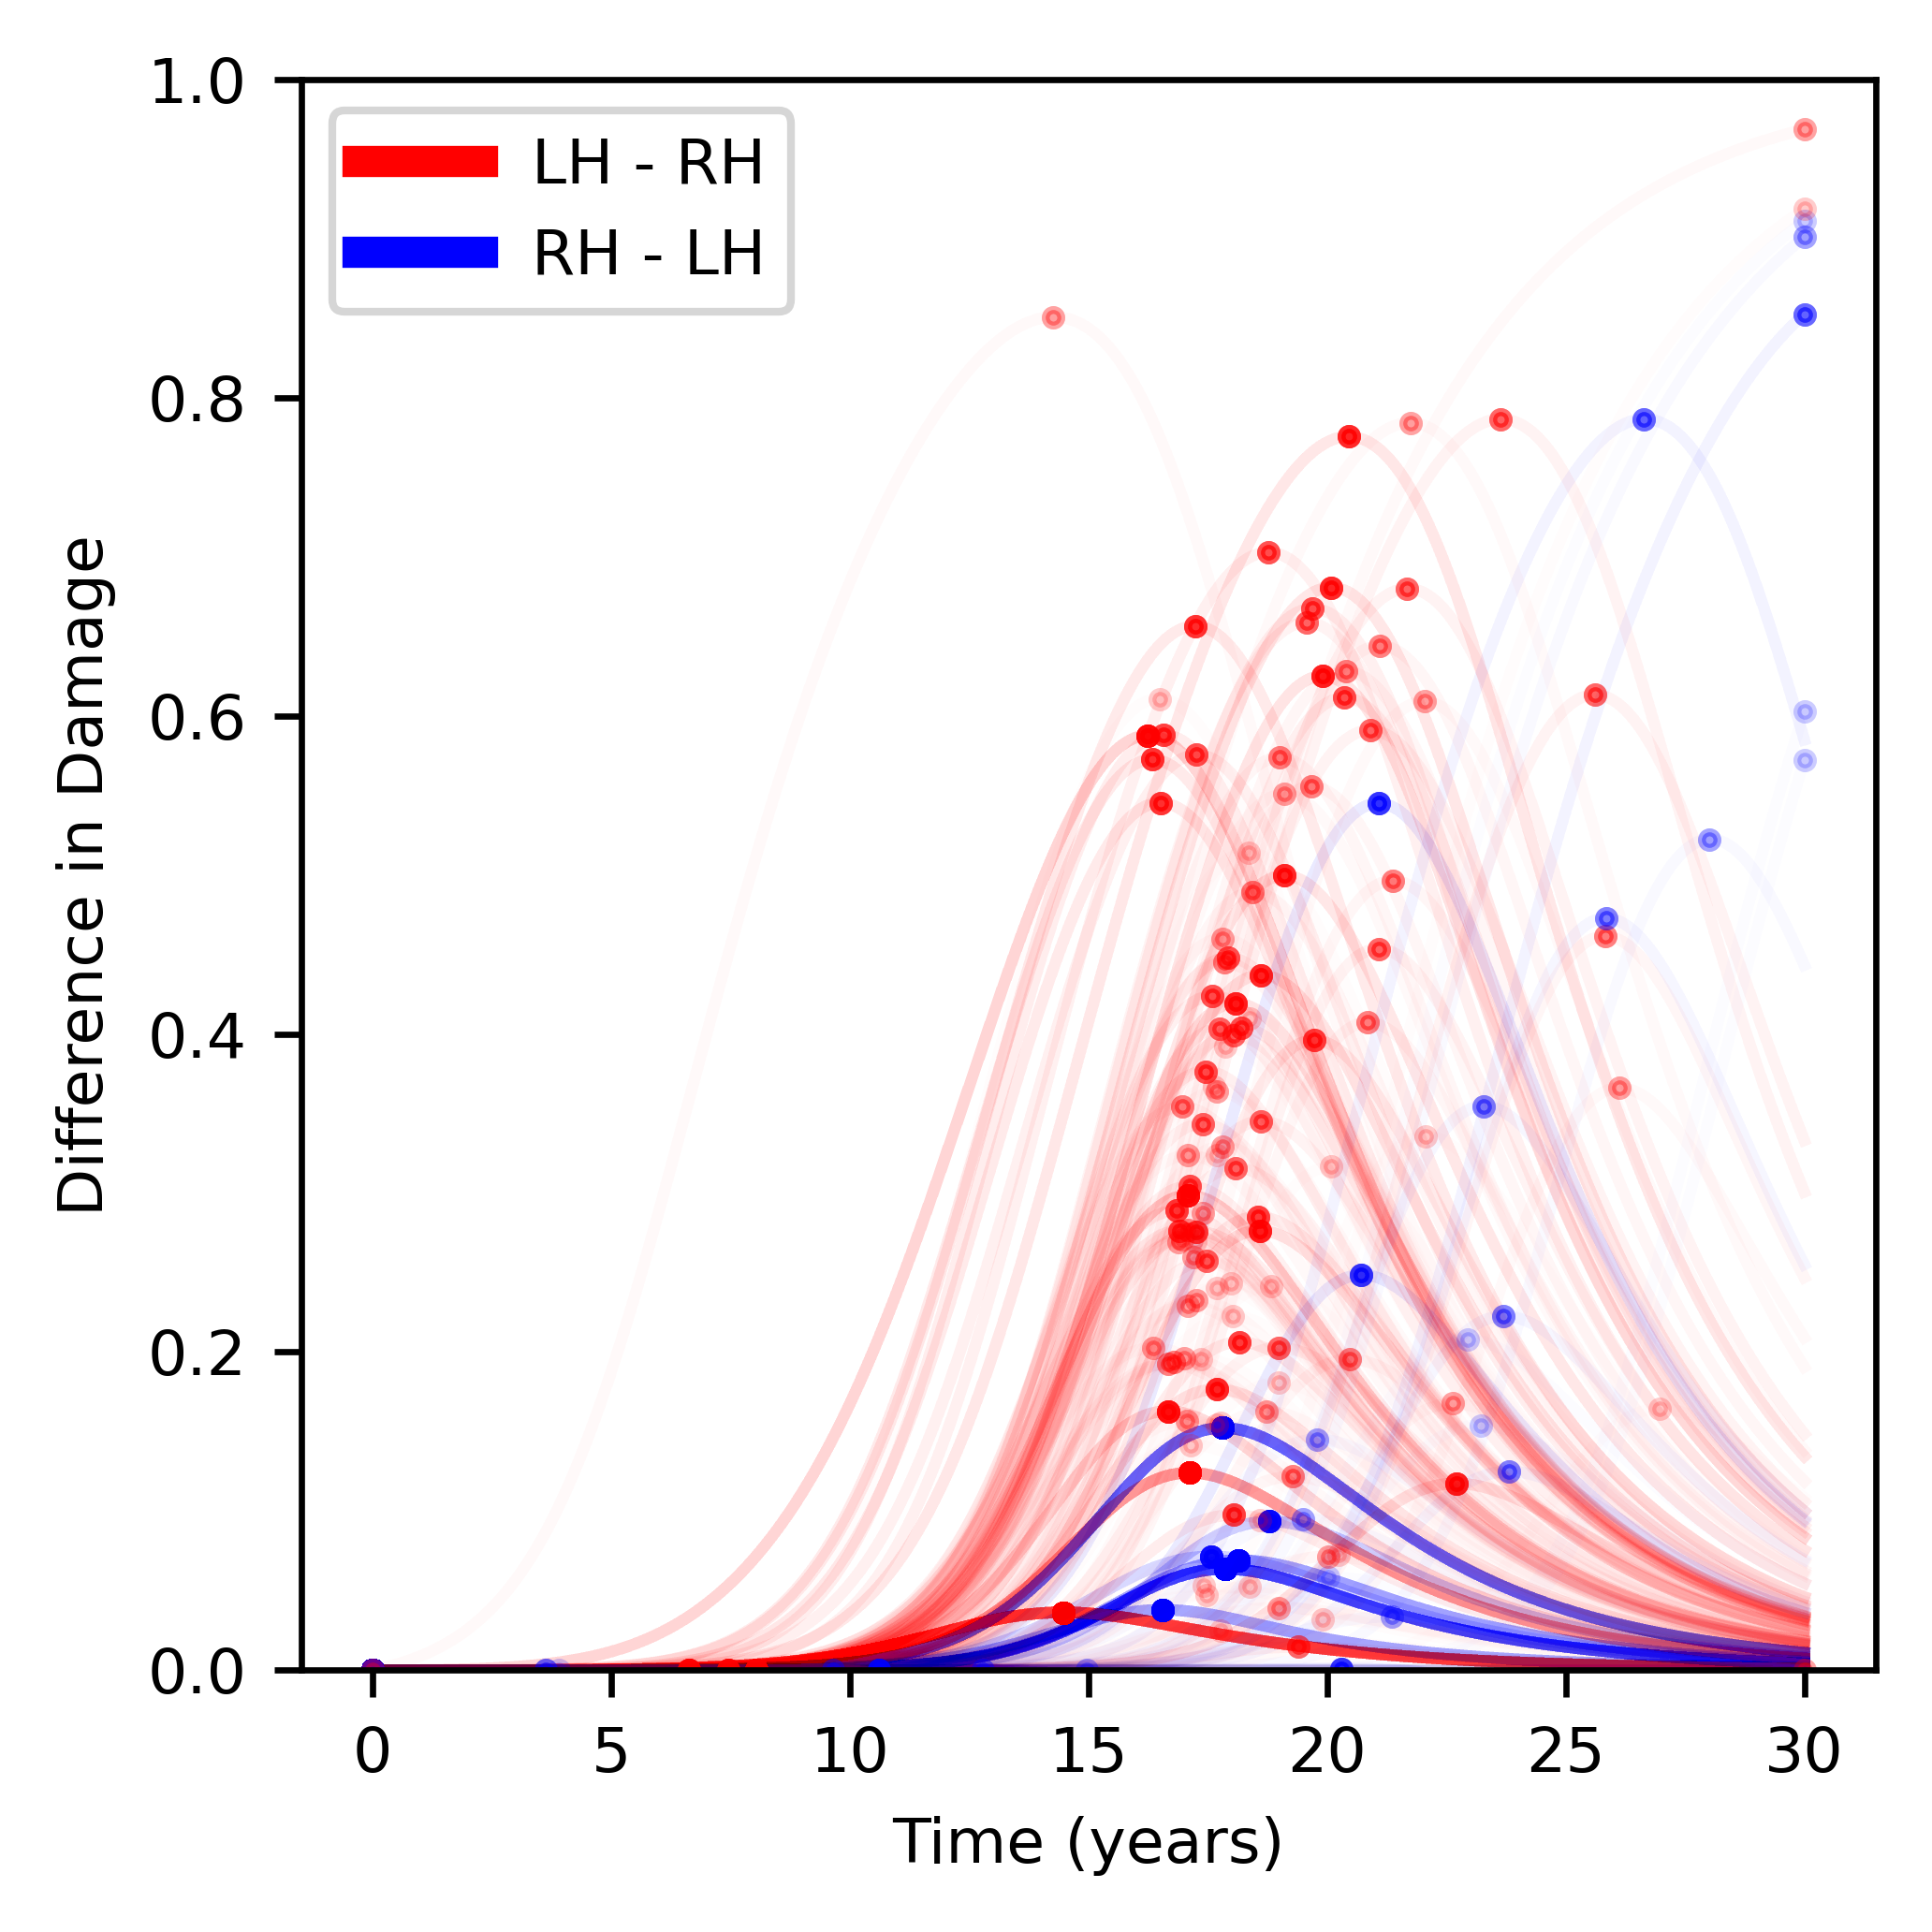

In [54]:
hemisphere_plot = plt.figure(**plot_settings)
for item in differences_list:
    
    plt.plot(item['time'], item['difference'], label=item['node_pair'], color=color_map[item['hemisphere']], alpha=0.01)
    
    #plt.plot(item['time'], (item['difference'] * -1), label=item['node_pair'], color='blue', alpha=0.01)

#plt.title('Time vs. Damage Difference \n Between Equivalent Nodes Across Hemispheres')
plt.xlabel('Time (years)')
plt.ylabel('Difference in Damage')
plt.ylim([0,1])

# Plotting

for item in differences_list:
    # Find the peak point of the difference
    peak_time = item['time'][np.argmax(item['difference'])]
    peak_difference = np.max(item['difference'])

    # Plot only the peak point
    plt.plot(peak_time, peak_difference, label=item['node_pair'], color=color_map[item['hemisphere']], 
             marker='o', markersize=2, linestyle='None', alpha=0.2)

from matplotlib.lines import Line2D
custom_lines = [
    Line2D([0], [0], color='red', lw=4, label='LH - RH'),
    Line2D([0], [0], color='blue', lw=4, label='RH - LH'),
]

# Adding the custom legend to the plot
plt.legend(handles=custom_lines, loc='best')  # Use the custom handles here



# saves the plot
plt.tight_layout()
plt.savefig('hemisphere_plot.png')

plt.show()
